<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Tensorflow 2 Object Detection API - Detecting Otters in Singapore

Content:-
- [Background](#Background)
- [Problem Statement](#Problem_Statement)
- [What is Object Detection](#Object_Detection)
- [Mean Average Precision](#mAP)
- [Data Preparation](#data)
    - [Flickr scraper API](#Flickr)
    - [Roboflow](#Roboflow)
- [Tensorflow 2 Object Detection API](#Tensorflow)
- [Streamlit](#Streamlit)
- [Summary](#Summary)

<a id="Background"></a>
# Background

## What is happening in Singapore? 

Singapore's otter population has more than doubled since 2019 - with the current estimate at around 170, roughly 17 families. In 2020, NParks received 208 citizen reports about otters, followed by 305 in 2021, and more than 300 as of this August. Although most reports are sightings, otters have been known to lash out when threatened. ([source](https://www.theguardian.com/environment/2022/oct/23/slippery-hungry-sometimes-angry-singapore-struggles-with-unparalleled-otter-boom)) 

There has been many news article coverage on them locally on Straits Times, Today, Mothership and even on international news such as CNA, The Guardian, BBC News and SCMP. 

With the increase in population, there has also been an increase in incidents of otters attacking people at Kallang Riverside Park([source](https://www.straitstimes.com/singapore/man-bitten-by-otter-after-trailing-pack-of-30-during-morning-run)) and Botanic Gardens([source](https://www.bbc.com/news/world-asia-59592355)). This has also created some trouble with home owners([source](https://mothership.sg/2022/10/bukit-timah-otter-eat-40-koi-fish/)) and building management for condominiums([source](https://www.todayonline.com/singapore/otters-seen-eating-fish-condominium-along-alexandra-canal-upsetting-residents)) as the otters roam freely, killing and feeding on koi and other fishes. 

This has prompted local authority NParks to relocate the otters away from local residential areas([source1](https://www.channelnewsasia.com/singapore/otters-seletar-relocation-last-resort-pups-holts-3012831))([source2](https://www.scmp.com/week-asia/health-environment/article/3196279/singapore-move-otters-out-residential-areas-more-hunt)). This has also led to discussions on managing the local otter population. Sightings were rare up until late 1998 when a pair of otters were spotted at Sungei Buloh Wetlands Reserve. It is also saddening that culling is the first thought of many keyboard warriors comments online, however the thoughts differ on ground. Experts also do not agree with culling with the current population, it is still manageable([source](https://www.todayonline.com/singapore/otter-population-sharply-still-manageable-say-experts-who-urge-public-learn-co-exist-them-1767076)). The priority should be to co-exist as the nation progresses with its [City in Nature goal](https://www.todayonline.com/singapore/cutting-landfill-waste-mandating-cleaner-vehicles-among-slew-goals-unveiled-singapore) as well. The public will also need to be educated, especially that although the otters may be cute and seemingly approachable, that they are nontheless wild animals and adult otters could potentially become aggressive with pups around. 

<a id="Problem_Statement"></a>
# Problem Statement

The bottomline is that things have to be managed. Singapore has to learn to co-exist with the otters and culling should not be an option for a City in Nature unless absolutely necessary. 

This project aims to detect the number of otters from an image, video or live stream and return the number of counts of otters identified. With that information, it can then be translated into many other uses. For example, security for the home owners and building management - a warning sound could be activate when the number of otters detected is above a threshold number or tracking of the otters by NParks just by counts. 

<a id="Object_Detection"></a>
# What is Objection Detection

## Which brings us to the question - how can this be done?

A typical image classification would not be sufficient which is why we look to objection detection. 

Object recognition is a general term to describe a collection of related computer vision tasks that involve identifying objects in digital photographs([source](https://machinelearningmastery.com/object-recognition-with-deep-learning/)). 

Image classification involves assigning a class label to an image, whereas object localization involves drawing a bounding box around one or more objects in an image. Object detection is more challenging and combines these two tasks and draws a bounding box around each object of interest in the image and assigns them a class label. Together, all of these problems are referred to as object recognition.

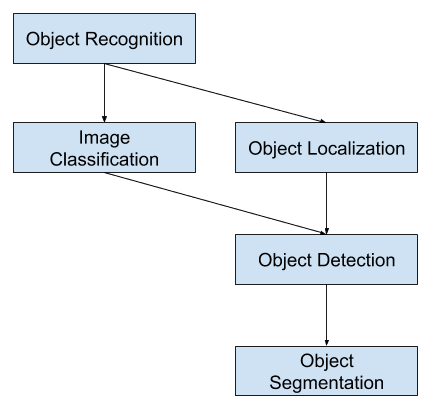

- Image Classification: Predict the type or class of an object in an image.
Input: An image with a single object, such as a photograph.
Output: A class label (e.g. one or more integers that are mapped to class labels).

- Object Localization: Locate the presence of objects in an image and indicate their location with a bounding box.
Input: An image with one or more objects, such as a photograph.
Output: One or more bounding boxes (e.g. defined by a point, width, and height).

- Object Detection: Locate the presence of objects with a bounding box and types or classes of the located objects in an image.
Input: An image with one or more objects, such as a photograph.
Output: One or more bounding boxes (e.g. defined by a point, width, and height), and a class label for each bounding box.

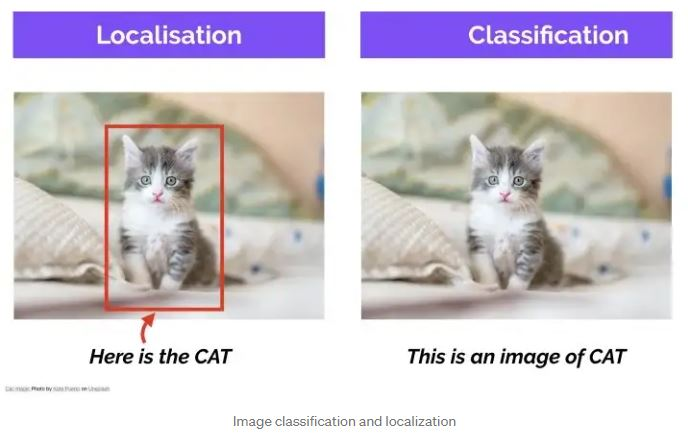
([source](https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2))

## Types of techniques

### R-CNN
The R-CNN family of methods refers to the R-CNN, which may stand for “Regions with CNN Features” or “Region-Based Convolutional Neural Network,” developed by Ross Girshick, et al.

This includes the techniques R-CNN, Fast R-CNN, and Faster-RCNN designed and demonstrated for object localization and object recognition.

One of the latest SOTA model is the Faster R-CNN.

Although it is a single unified model, the architecture is comprised of two modules:

Module 1: Region Proposal Network. Convolutional neural network for proposing regions and the type of object to consider in the region.
Module 2: Fast R-CNN. Convolutional neural network for extracting features from the proposed regions and outputting the bounding box and class labels. 

### YOLO 
YOLO or “You Only Look Once,” developed by Joseph Redmon, et al.

The R-CNN models may be generally more accurate, yet the YOLO family of models are fast, much faster than R-CNN, achieving object detection in real-time.

### MobileNet
As the name applied, the MobileNet model is designed to be used in mobile applications, and it is TensorFlow’s first mobile computer vision model([source](https://medium.com/analytics-vidhya/image-classification-with-mobilenet-cc6fbb2cd470)).

MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.

### Model Selection
In this project we will be utilizing the pretrained model **_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_** from Tensorflow 2 Object Detection API([source](https://github.com/tensorflow/models/tree/master/research/object_detection))

There are many available pretrained models in the Tensorflow 2 Object Detection Model Zoo([source](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)), with a range of speed(speed(ms)), score(COCO mAP) and output, however due to hardware limitations and for deployment, a lighter model is chosen in this case. It is also possible to utilize google colab or other cloud platforms for the GPU to do the customized training of the model. 

An extraction from the Tensorflow 2 Object Detection Model Zoo for comparison purposes (not the full list). The model training can be computationally expensive, given if there are large amount of images dataset to work with.

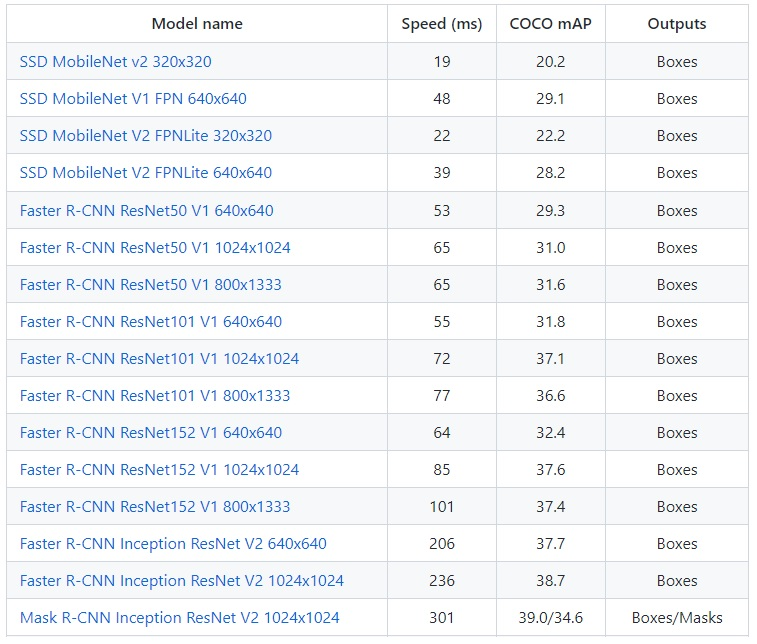

<a id="mAP"></a>
# Mean Average Precision (mAP) 

Object detection systems make predictions in terms of a bounding box and a class label. For each bounding box, we measure an overlap between the predicted bounding box and the ground truth bounding box. This is measured by IoU (intersection over union)([source](https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2)).

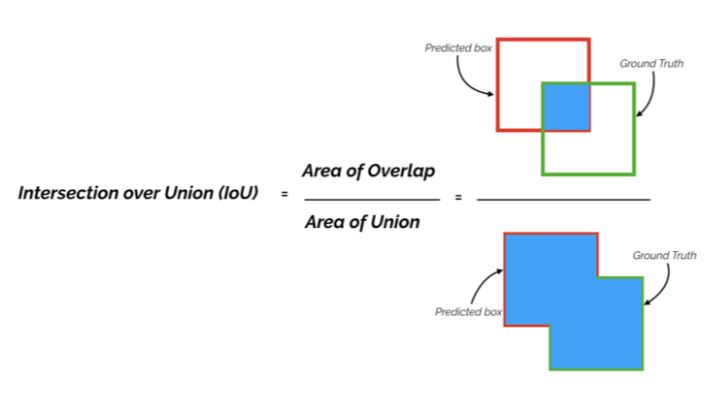

For object detection tasks, we calculate Precision and Recall using IoU value for a given IoU threshold.

For example, if IoU threshold is 0.5, and the IoU value for a prediction is 0.7, then we classify the prediction as True Positive (TF). On the other hand, if IoU is 0.3, we classify it as False Positive (FP).

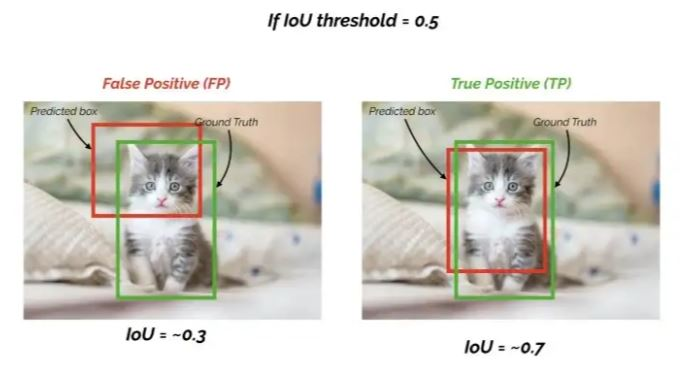

That means that we may get different binary true or false positives by changing the IoU threshold. In general a high IoU would be a more stringent requirement to get a good mAP score - the predicted box must have a high overlap with the ground truth box in order to be a true positive. 

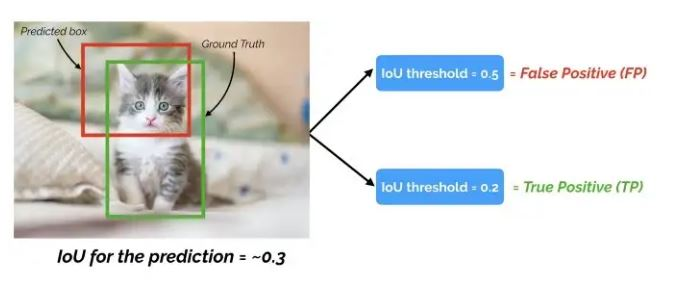

The general definition for the Average Precision (AP) is finding the area under the precision-recall curve.

mAP (mean average precision) is the average of AP.

The mean Average Precision or mAP score is calculated by taking the mean AP over all classes and/or overall IoU thresholds, depending on different detection challenges that exist.

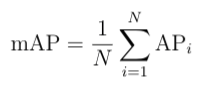([source](https://www.v7labs.com/blog/mean-average-precision#:~:text=let's%20dive%20in!-,What%20is%20Mean%20Average%20Precision%20(mAP)%3F,values%20from%200%20to%201.))

Precision is a measure of when ""your model predicts how often does it predicts correctly?"" It indicates how much we can rely on the model's positive predictions. 

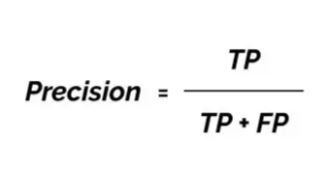

Recall is a measure of ""has your model predicted every time that it should have predicted?"" It indicates any predictions that it should not have missed if the model is missing. 

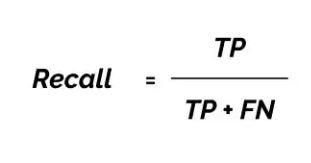

<a id="data"></a>
# Data Preparation

In order to do a customized training on the pretrained model selected from Tensorflow 2 Object Detection Model Zoo, we will need to prepare a training and validation set of images with labelling. 

<a id="Flickr"></a>
## Flickr scraper API 

For collection of images, we would utilize the Flickr image-scraping software developed by Ultralytics LLC.

https://github.com/ultralytics/flickr_scraper

It requires you to have a Flickr account and a personal API key and secret which can be obtained from https://www.flickr.com/services/apps/create/apply

A total of 700 images of otters were extracted with the API. 

<a id="Roboflow"></a>
## Roboflow

Traditionally hand [labelling](https://github.com/heartexlabs/labelImg) is required for preparing the images data. Labelimg is one of the first few tools that many have utilized. Since then many other platforms have also been developed and labelimg itself has also been updated. 

In this project, the platform that we utilized is [Roboflow](https://roboflow.com/). It has an option of utilizing a pretrained model to assist with the labelling, however more specific objects still have to be hand labelled (in our case, otters were not able to be detected by the AI assist). Roboflow also allows for segregation to train/validation/test sets, preprocessing options as well as augmentation if required. Since our final model ultilizes 320x320 images, we can use Roboflow to resize the images accordingly to reduce the workload on our model training (without GPU). Of the 700 images scrapped from Flickr, we would utilize 500 for training and 50 for validation. 

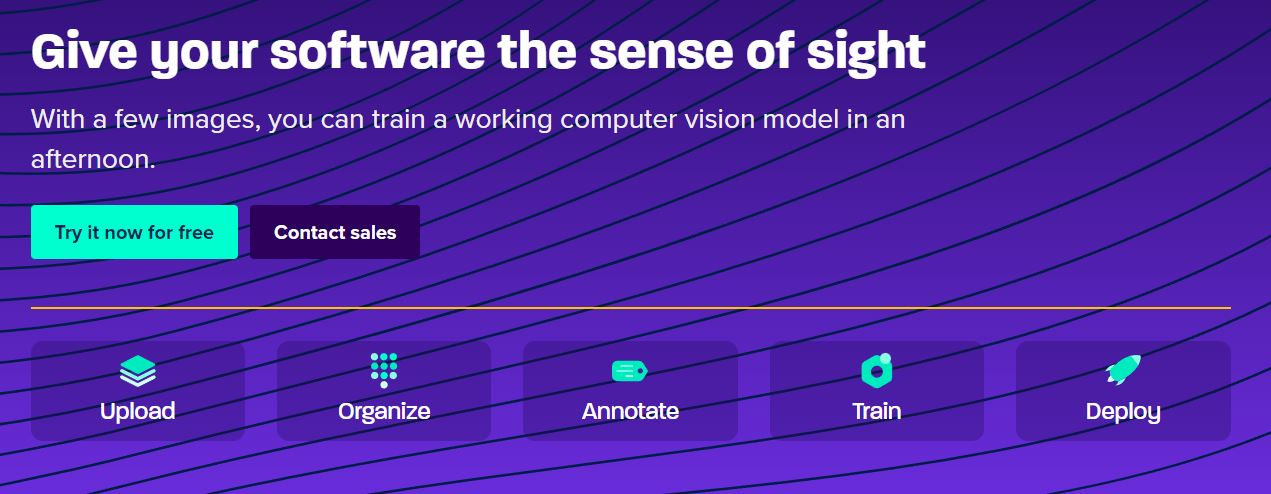

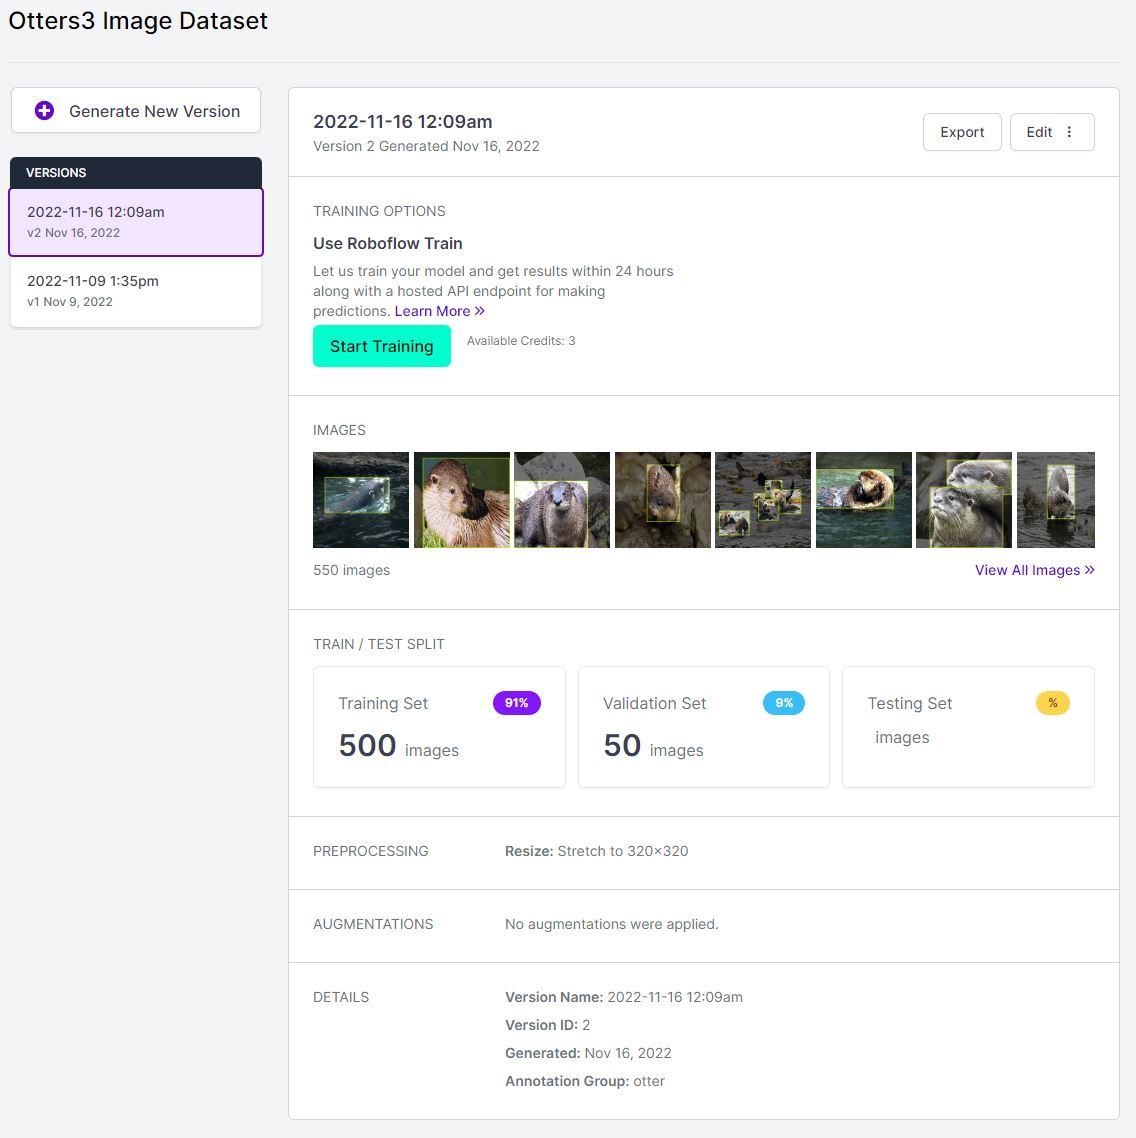

<a id="Tensorflow"></a>
# Tensorflow 2 Object Detection API

The notebook currently shows the final version utilizing *ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8* which is exported to tf lite for deployment on streamlit. 

- Tensorflow 2 Object Detection API ([source](https://github.com/tensorflow/models/tree/master/research/object_detection))

- Installation Guide ([source1](https://github.com/tensorflow/models)) ([source2](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html))

- Installation Guide and runthrough by nicknochnack ([source1](https://www.youtube.com/watch?v=yqkISICHH-U)) ([source2](https://github.com/nicknochnack/TFODCourse))

## 1. Setup Paths

These codes help to create the folders and paths which will be used subsequently. 

The naming are all customizable according to folder names/ pretrained models to be used for customized training. 

In [3]:
import os

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_v4' # the final model is a 4th iteration 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## 2. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

Refer to the guides for help in installation of tensorflow and selecting which pretrained models to utilize. 

In [5]:
import object_detection

In [7]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.3.0
anyio                         3.6.2
apache-beam                   2.42.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.1.0
astunparse                    1.6.3
attrs                         22.1.0
avro-python3                  1.10.2
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.2.0
certifi                       2022.9.24
cffi                          1.15.1
charset-normalizer            2.1.1
cloudpickle                   2.1.0
colorama                      0.4.6
contextlib2                   21.6.0
contourpy                     1.0.6
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.32
debugpy                       1.6.

In [ ]:
# if os.name=='nt':
#     !pip install wget
#     import wget

In [ ]:
import wget

In [ ]:
# this is similar to downloading the pretrained model from https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md and extracting the zip file in the folder.
# if there are issues with wget, you can manually download as well. 

if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

## 3. Create Label Map

This is the code implementation but can also be done on roboflow

In [13]:
labels = [{'name':'otter', 'id':1, 'display_name':'otter'}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 4. Create TF records

This is the code implementation but can also be done on roboflow

In [18]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'validate')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'validate.record')} 

## 5. Copy Model Config to Training Folder

Copy the pretrained model's configuration to use as the base for training, we take a look at this further in the next step. 

In [6]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


## 6. Update Config For Transfer Learning

In [7]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

Take a look at the original configuration of the pretrained model. There are parameters to be filled in accordingly. 

Note that the pretrained model is trained on COCO 2017 data set and has 90 classes. 

We will be predicting only 1 class for the otters detection. 

In [8]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [9]:
# original pretrained model config
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

Generate customized configurations

In [10]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
# number of classes to take reference from number of labels
# batch size can be adjusted according to training requirement - see next step
# input labelmap location
# input TFrecord path

pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'validate.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 7. Train the model

Things to note 
- In the above cell, we changed the batch size to 4 
- We have 500 training images and 50 validation images 
- 500/4 = 125 
- number of train steps should be adjusted according to reach ~200 epoch 
- 125 X 200 = 25000 steps required

In [6]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=25000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_v4\pipeline.config --num_train_steps=25000


In [ ]:
!{command}

Run the following in terminal to see the progress

- python "Tensorflow\models\research\object_detection\model_main_tf2.py" --model_dir="Tensorflow\workspace\models\my_ssd_mobnet" --pipeline_config_path="Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config" --num_train_steps=2000

(Note) For some reason, using git bash requires the " " at the ends to work

- python "Tensorflow\models\research\object_detection\model_main_tf2.py" --model_dir="Tensorflow\workspace\models\my_ssd_mobnet_v4" --pipeline_config_path="Tensorflow\workspace\models\my_ssd_mobnet_v4\pipeline.config" --num_train_steps=25000

A pretrained model based on *ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8* was also tested with 2000 train steps only. However this gave an undesirable result. Due to the time required for training, we kept with the *ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8* and increased the number of training steps to 25000. 

320x320 with 25000 steps took ~6 hours for training. There are various tunings possible including increasing the number of training steps, changing of batch size (depends on computational power), increasing the number of images for training dataset. 

We will look at both results afterwards.

## 8. Evaluate the Model with Tensorboard

In [7]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [8]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_v4\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4


In [22]:
!{command}

^C


Again, run this in terminal to see the progress

- python "Tensorflow\models\research\object_detection\model_main_tf2.py" --model_dir="Tensorflow\workspace\models\my_ssd_mobnet" --pipeline_config_path="Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config" --checkpoint_dir="Tensorflow\workspace\models\my_ssd_mobnet"

### Following results extracted from terminal

#### *ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8* with 2000 training steps, 500 training images, 50 validation images

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.302
 
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.661
 
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.252
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.302
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.309
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.514
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.576
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.576

#### *ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8* with 25000 training steps, 500 training images, 50 validation images (~6 hours training time) 

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.530
 
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.822
 
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.617
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.531
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.543
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.647
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.683
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.683
 
#### Findings 
 
The final model shows a significant improvement to achieve decent results. Average Precision at IoU=0.50 increase from 0.661 to 0.822. Average Precision at IoU=0.75 increased from 0.252 to 0.617. It is also noted that as the IoU threshold increases, the average precision falls. This is expected as the the conditions for true positive become more stringent as IoU threshold increases. Still the results were decent for usage. 

Average recall also improved overall. 

The other possible tuning that can be done is to increase the number of training images dataset. However, this was kept as a constant due to time and computational power limitations. 

#### Using Tensorboard

In the trained model train and evaluation folders

Run the following in terminal, tensorboard --logdir=. then copy http://localhost:6006/ paste in browser

From Tensorboard, you are able to see the loss from the training folder 

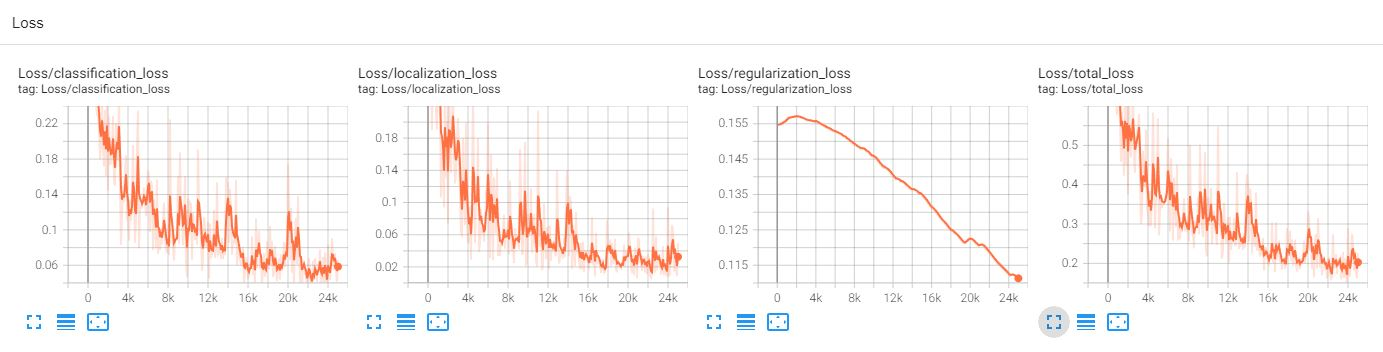

As well as the mAP and AP from the evaluation folder 

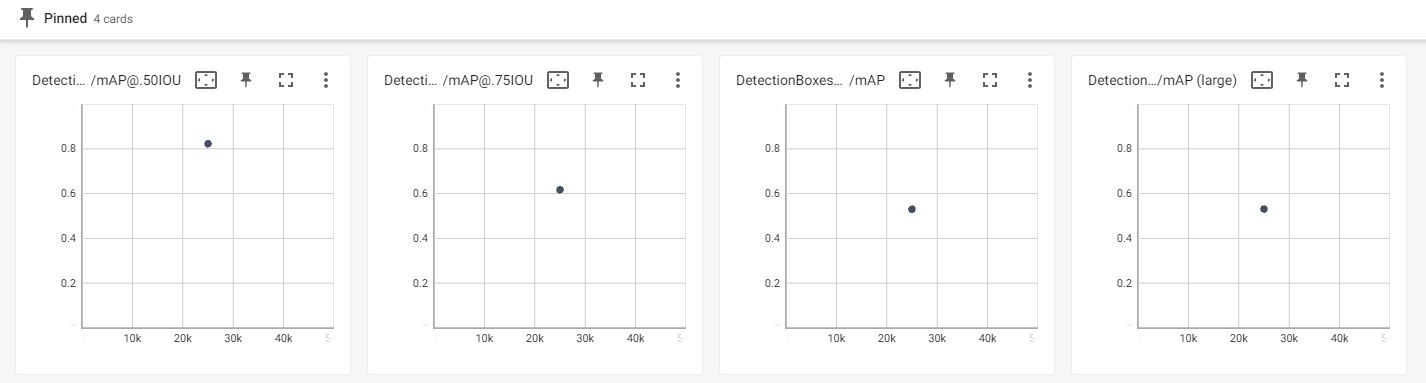

Tensorboard also shows the result of the validation image data set

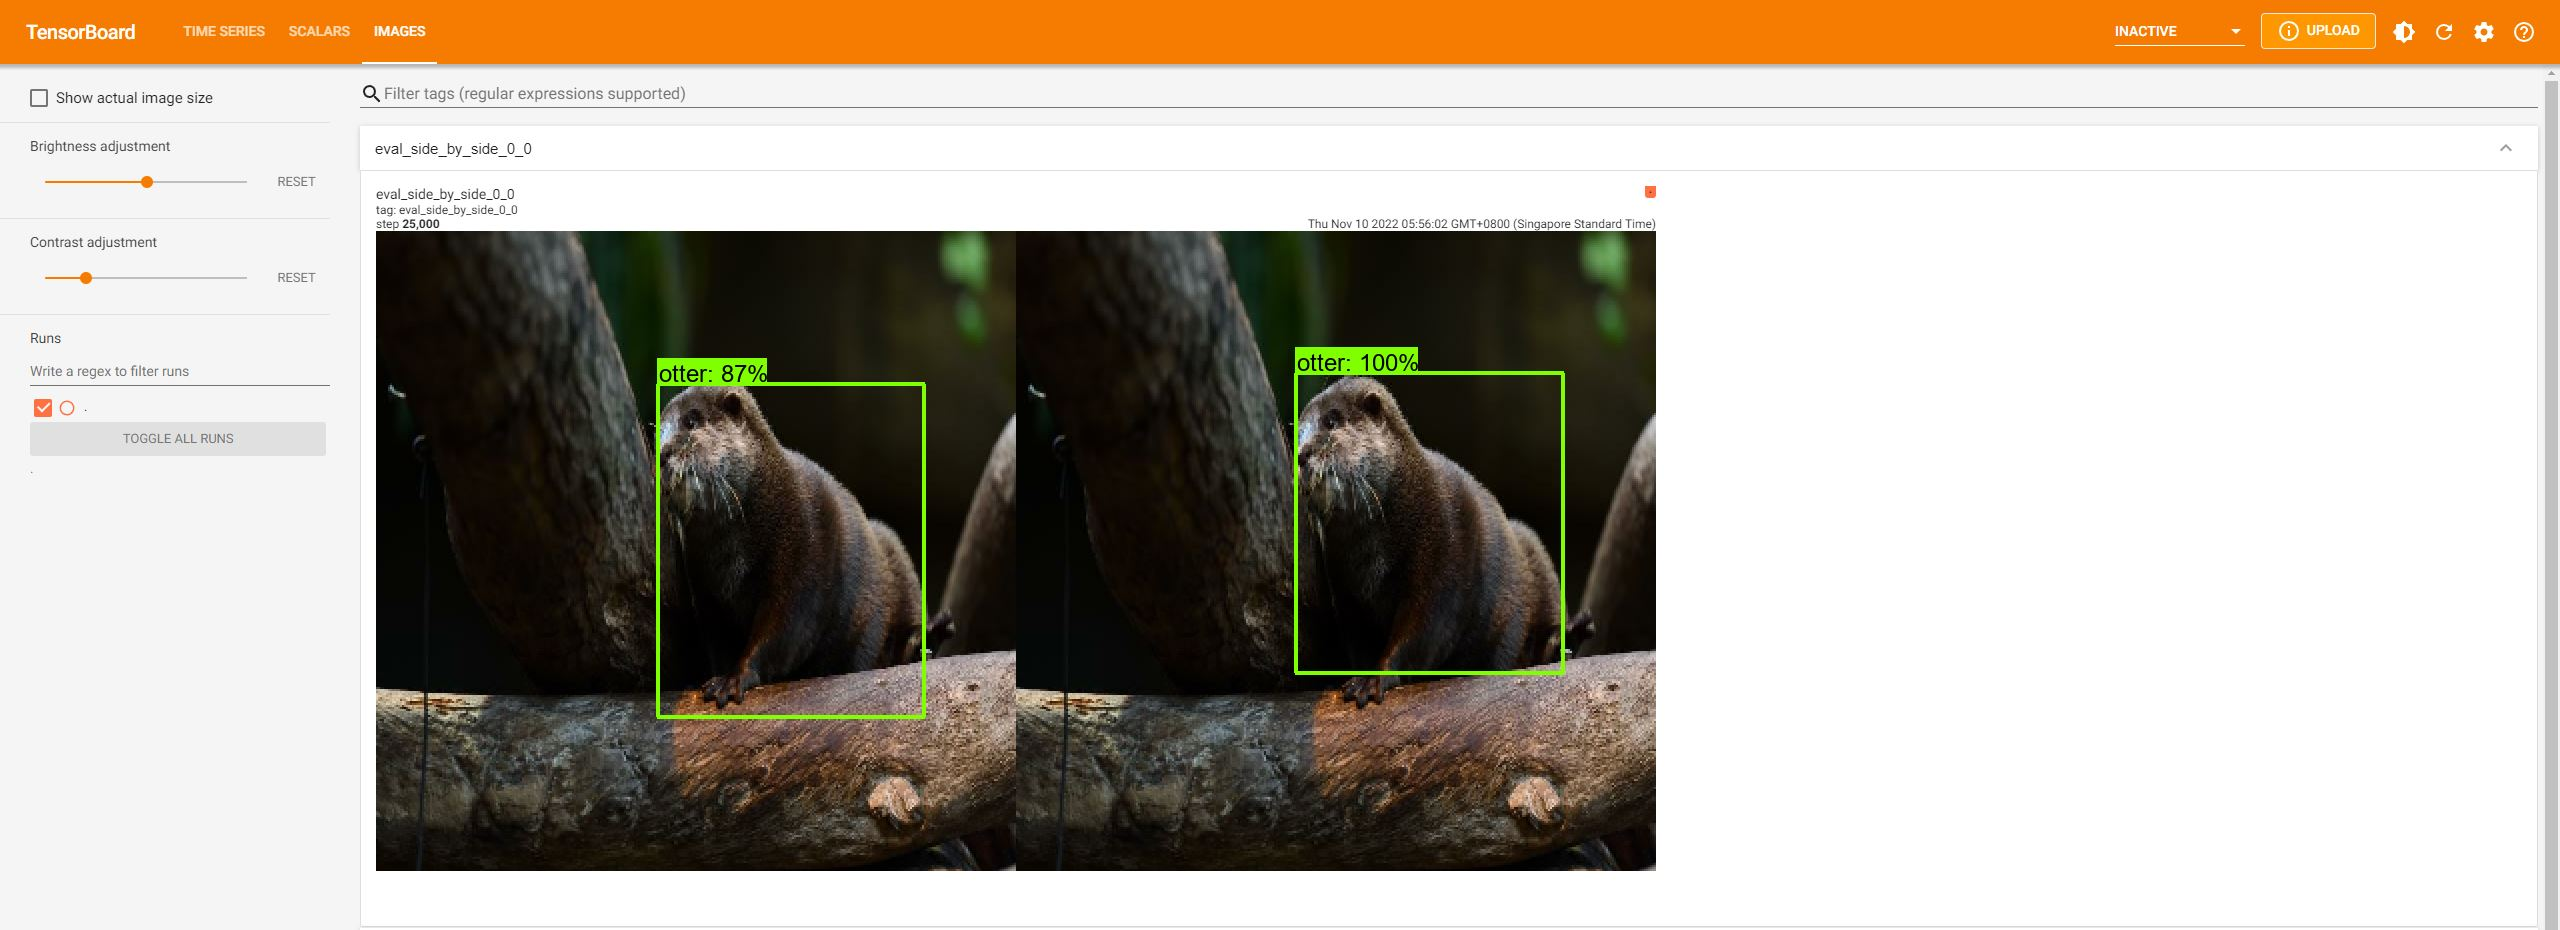

## 9. Load Train Model From Checkpoint

In [7]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-26')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## 10. Detect from an Image

Once the model training is completed, we can now use it to detect otters from images, videos and live webcam. 

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [54]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1otter.jpg')

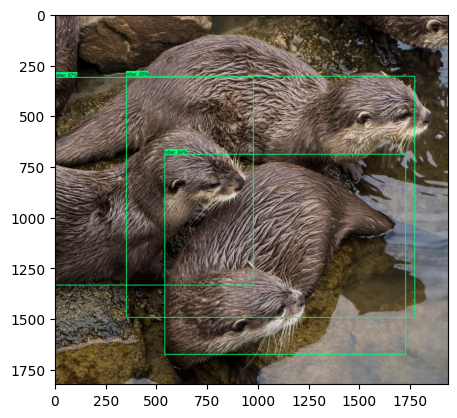

In [46]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

%matplotlib inline
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
# return the number of otters detected
count = len([x for x in detections['detection_scores'] if x>0.8])
count

3

## 11. Real Time Detections from your Webcam

In [12]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    # use 'q' to stop the webcam streaming
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

Real time detection from webcam is included to test if it works and also to simulate a possible scenario of a security camera detecting otters. This feature however is not included in the final streamlit deployment and may be considered as future improvements to the project. 

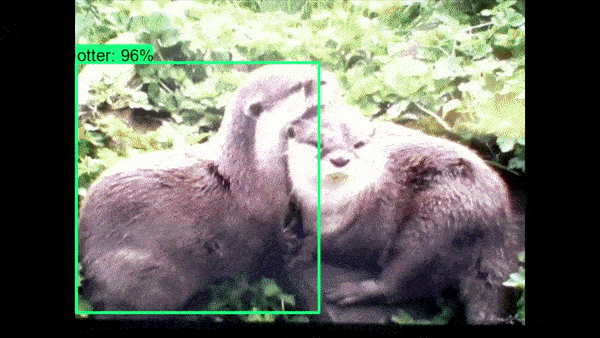

## 12. Output on video

In [2]:
# the output for video is slightly more complicated than for images
# the video is essentially broken down into its frame and each frame is passed through the detection
# functions are introduced and required to do the loop

In [15]:
# generic function for detection
def run_detect(testimage):
    img = testimage
    image_np = np.array(img)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes']+label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=.77,
        agnostic_mode=False)
    
    return image_np_with_detections

In [18]:
# test function for output of images
# ensure that the generic function above works
def detect_image(path, output_path):
    image = cv2.imread(path)
    output_file = run_detect(image)
    
    %matplotlib inline
    plt.imshow(cv2.cvtColor(output_file, cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite(output_path, output_file)

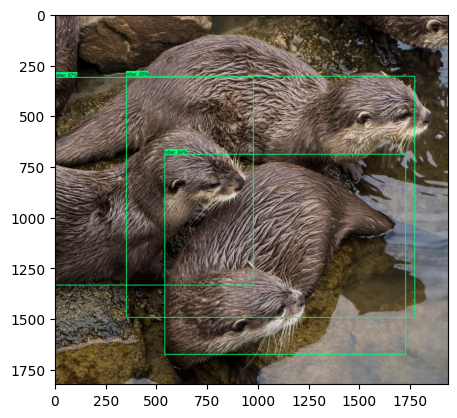

In [20]:
detect_image('Tensorflow/workspace/images/test/1otter.jpg','Tensorflow/workspace/images/test/1otter_predict.jpg')

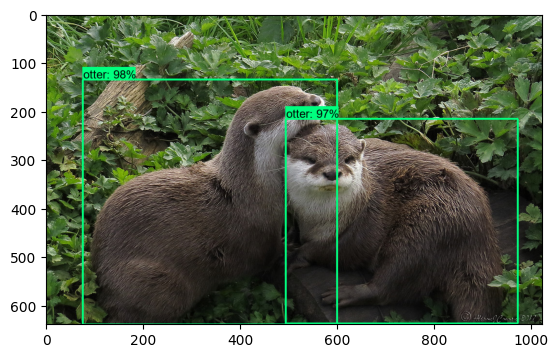

In [19]:
detect_image('Tensorflow/workspace/images/test/2otter.jpg','Tensorflow/workspace/images/test/2otter_predict.jpg')

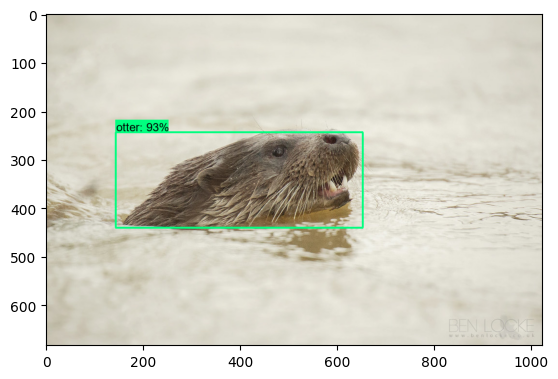

In [21]:
detect_image('Tensorflow/workspace/images/test/3otter.jpg','Tensorflow/workspace/images/test/3otter_predict.jpg')

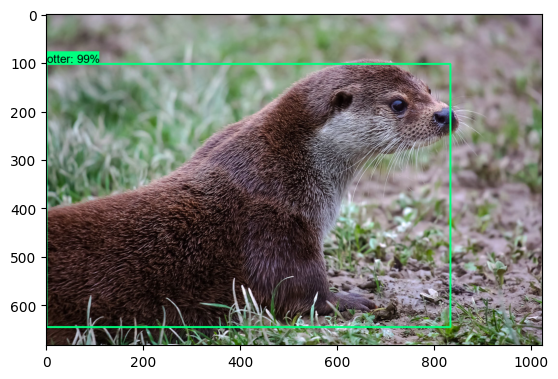

In [22]:
detect_image('Tensorflow/workspace/images/test/4otter.jpg','Tensorflow/workspace/images/test/4otter_predict.jpg')

In [74]:
# Predict video from folder
def detect_video(path, output_path):
    
    # Set output video writer with codec
    fourcc = cv2.VideoWriter_fourcc(*'h264')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (1920, 1080)) # the framerate and resolution must match the input of the video to be predicted on, check the video properties for more information 
                          
    # Read the video
    vidcap = cv2.VideoCapture(path)
    frame_read, image = vidcap.read()
    count = 0
    
    # Iterate over frames and pass each for prediction
    while frame_read:
        
      # Perform object detection and add to output file
      output_file = run_detect(image)
      
      # Write frame with predictions to video
      out.write(output_file)
      
      # Read next frame
      frame_read, image = vidcap.read()
      count += 1
        
    # Release video file when we're ready
    out.release()

In [77]:
detect_video('video3.mp4', 'video_output3.mp4')

The otter detection for videos perform poorer than images. It was noted that when the otters may not be detected when they appear small on screen. Similarly, the resolution and framerate of the video would play a part in the performance of the detection, as each video is broken down into its individual frame and passed through the detection. 

## 13. Freezing the Graph

In [22]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [23]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [24]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_v4\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4 --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_v4\export


In [25]:
!{command}

2022-11-11 14:24:23.272178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-11 14:24:23.272233: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-11 14:24:28.375579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-11 14:24:28.376815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-11-11 14:24:28.378141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-11-11 14:24:28.379395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

## 14. Conversion to TFLite

In [6]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [7]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [8]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_v4\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4 --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_v4\tfliteexport


In [9]:
!{command}

2022-11-13 23:31:59.330800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-13 23:31:59.340774: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 23:32:31.415859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-13 23:32:31.418099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-11-13 23:32:31.420312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-11-13 23:32:31.422144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [10]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [11]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [12]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet_v4\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet_v4\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [13]:
!{command}

Estimated count of arithmetic ops: 1.698 G  ops, equivalently 0.849 G  MACs


2022-11-13 23:34:00.231109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-13 23:34:00.231164: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 23:34:03.809281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-13 23:34:03.810657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-11-13 23:34:03.811894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-11-13 23:34:03.813083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

<a id="Streamlit"></a>
# Streamlit

The deployment to Streamlit takes the input from users as images or snapshots from live webcam using the TF Lite model converted from the above code. One of the main reasons for choosing the mobilenet model is for the benefit of being a lighter weight model in comparison with YOLO or Faster R-CNN. It also allows for a lighter deployment that can be used on mobile and websites such as Streamlit. Object detection of the otters via live stream on webcam was excluded from the Streamlit and could be an improvement to be added on. 

However, it is also noted that the performance of the model after conversion to TF Lite format is not as capable as the original customized model. 

The final deployment can be found here https://desmondyapjj-capstone-project-streamlitweb-app-wmmrox.streamlit.app/

<a id="Summary"></a>
# Summary

As the otters' population grow, it would be necessary to find methods to co-exist with them. There are two main concerns to be addressed, from the residents and building managements' point of view - a deterrence, from a local authority such as NParks' point of view - a way to track and identify the otters. 

There are many techniques for object detection and we have briefly covered some of them. These techniques can be computationally taxing but nonetheless, hold the potential to do many things. 

Our final customized model is based on pretrained model ssd_mobilenet_v2_fpnlite_320x320. A total of 700 images were scraped from Flickr via Flickr scraper API and a data set of 500 training images and 50 validation images were prepared using Roboflow. Running through 25000 training steps returned decent results to be used in model prediction and deployment. We tested the model's prediction on images, videos and live webcam streaming. Average Precision at IoU=0.5 and IoU=0.75 were 0.822 and 0.617 respectively. The model was then exported to TF Lite to be deployed on streamlit. 

In this end, we hope to simulate the experience and show the possibility of incorporating object detection to other platforms, such as security cameras. The Streamlit app is made to display a warning sound when 3 or more otters are detected in the image input by the users. This is akin to a deterrence in a real world situation perhaps to scare off the otters and prevent them from entering the residential premises. Although there are other preventive measures, this can be viewed as an added on feature as a form of deterrence and automation since humans cannot be on guard 24hours a day and even physical barriers may be breached. Object detection can even be extended to other use cases in the future as well. 

### Recommendations

It is possible to utilize other pretrained models such as YOLO and Faster R-CNN to see which gives a better mAP score. There are also cloud platforms such as Google colab which allows certain hours of GPU usage in a week. 

The number of images used for training can also be increased as part of training model tuning. Other alternative tuning methods are augmentation (ssd_mobilenet_v2_fpnlite_320x320 has some built in augmentation in its base configuration, but more can be explored with Roboflow as well), training more epoch and training step. 

Streamlit can also do object detection based on a live webcam similar to the one ran in the code notebook. These would mimic a real world scenario more closely. 